# Etapa 01 - Geração da Base de Dados Sintética

## 🎯 Objetivo

Esta etapa tem como objetivo a criação de uma base sintética de funcionários com características realistas do mercado de trabalho brasileiro. Essa base será usada para análise de rotatividade (desligamento) e experimentação com modelos de machine learning no contexto de HR Analytics.

---

## 🧠 Justificativa

A criação de uma base simulada é necessária por:

- **Ausência de bases públicas brasileiras completas** e rotuladas com desligamento.
- **Privacidade e LGPD**, que restringem o uso de dados reais de RH.
- **Controle estatístico**, permitindo simular distribuições realistas, ajustar desbalanceamentos e gerar cenários sob demanda.

A função `gerar_base_rh_analitico` permite gerar dados reprodutíveis com base em uma semente fixa, e ajustar o tamanho da amostra conforme o objetivo da análise ou teste de modelo.

---

## 🧬 Variáveis Geradas

Abaixo, a descrição de cada campo do dataset e a lógica usada para sua geração:

- `Idade`: Distribuição normal com média 36 e desvio 9, limitada entre 18 e 65 anos.
- `Genero`: Masculino ou Feminino, com proporção 55/45.
- `Escolaridade`: Nível educacional de 1 (Fundamental) a 5 (Pós-graduação), com probabilidades baseadas no IBGE e mercado.
- `AreaFormacao`: Formação acadêmica (Exatas, Humanas, Saúde etc.), distribuída aleatoriamente.
- `Setor`: Simula alocação em setores como Vendas (50%), P&D (35%) e RH (15%).
- `Cargo`: Escolhido com base no setor (ex: “Executivo de Vendas” para Vendas).
- `NivelCargo`: Escore entre 1 e 5 baseado na idade e escolaridade (proxy de senioridade).
- `AnosExperiencia`: Calculado como Idade - 18 com fator aleatório, mínimo 0.
- `AnosEmpresa`: Tempo de casa limitado pela experiência.
- `AnosCargoAtual`: Tempo no cargo atual limitado pelo tempo na empresa.
- `AnosUltimaPromocao`: Tempo desde a última promoção.
- `AnosGestorAtual`: Tempo com o mesmo gestor.
- `EmpresasAnteriores`: Número de empresas anteriores com base no tempo de experiência.
- `SalarioMensal`: Base R$1.800 + bonificações por nível, escolaridade e experiência + ruído normal. Limitado entre R$1.400 e R$20.000.
- `DistanciaCasa`: Distância até o trabalho, distribuída exponencialmente entre 1 e 35 km.
- `ViagemTrabalho`: Frequência de viagens (Raramente, Frequente, Nunca).
- `SatisfacaoAmbiente`: Satisfação com o ambiente de trabalho (1 a 4), com maior concentração em níveis 3 e 4.
- `SatisfacaoTrabalho`: Satisfação com o próprio trabalho (1 a 4), com tendência semelhante.
- `SatisfacaoRelacionamento`: Satisfação com colegas e liderança.
- `EquilibrioVida`: Work-life balance (1 a 4).
- `HorasExtras`: Sim ou Não, com probabilidade aumentada para jovens e cargos operacionais.
- `EstadoCivil`: Solteiro(a), Casado(a), Divorciado(a).
- `Desligamento`: Variável-alvo binária (Sim ou Não), com cálculo baseado em um score de risco.

---

## 📊 Lógica do Score de Desligamento

A variável `Desligamento` é definida a partir de um score que considera:

- Alta probabilidade: baixa satisfação, excesso de horas extras, pouca promoção, distância, solteiros.
- Redução da probabilidade: cargos de nível mais alto e funcionários com mais tempo na empresa.
- O resultado final é uma probabilidade entre 5% e 45%.

---

## 🧪 Exemplo de Uso da Função (Abaixo)

In [16]:
import sys
import os
sys.path.append(os.path.abspath("../"))
from scripts.func import gerar_base_rh_analitico


# Exemplo de uso
if __name__ == "__main__":
    # Gerar dataset
    df = gerar_base_rh_analitico(1000, 42)

    print("Dataset gerado com sucesso!")
    print(f"Shape: {df.shape}")
    print("\nPrimeiras 5 linhas:")
    print(df.head())

    print("\nEstatísticas de Desligamento:")
    print(df['Desligamento'].value_counts(normalize=True))

    print("\nDistribuição de NivelCargo:")
    print(df['NivelCargo'].value_counts().sort_index())

    print("\nMédia de salário por NivelCargo:")
    print(df.groupby('NivelCargo')['SalarioMensal'].mean().round(2))

Dataset gerado com sucesso!
Shape: (1000, 23)

Primeiras 5 linhas:
   Idade     Genero  Escolaridade AreaFormacao                       Setor  \
0     40   Feminino             2       Exatas  Pesquisa e Desenvolvimento   
1     34   Feminino             1       Exatas  Pesquisa e Desenvolvimento   
2     41  Masculino             2   Tecnologia                      Vendas   
3     49  Masculino             3      Humanas  Pesquisa e Desenvolvimento   
4     33   Feminino             4      Humanas  Pesquisa e Desenvolvimento   

                 Cargo  NivelCargo  AnosExperiencia  AnosEmpresa  \
0          Pesquisador           2               20           11   
1   Gerente de Projeto           2               15            4   
2  Executivo de Vendas           2               22            8   
3       Diretor de P&D           3               28            6   
4   Gerente de Projeto           3               11            7   

   AnosCargoAtual  ...  SalarioMensal  DistanciaCasa  V


# Análise Exploratória de Dados (EDA)

Esta etapa visa entender a estrutura dos dados gerados pela função `gerar_base_rh_analitico`. A base representa cenários realistas de empresas brasileiras e foi criada para apoiar análises de rotatividade (desligamento) de funcionários.

## 📊 Estatísticas Gerais

```python
print(df.shape)
print(df.dtypes)
print(df.head())
print(df.describe())
```

- O dataset contém 1000 registros e 23 colunas.
- A maioria das variáveis são categóricas ou discretas.
- Algumas variáveis foram normalizadas ou calibradas para simular um cenário brasileiro.

## 🎯 Taxa de Desligamento

```python
print(df['Desligamento'].value_counts(normalize=True))
```

- Aproximadamente 22% a 28% dos funcionários simulados apresentam desligamento.

## 📈 Distribuição de Idade

```python
sns.histplot(data=df, x='Idade', hue='Desligamento', kde=True)
```

- A idade média dos funcionários é de **~36 anos**, com variação entre 18 e 65.
- Funcionários mais jovens tendem a desligar menos que os de meia idade (30-45).

## 🎓 Escolaridade

```python
print(df['Escolaridade'].value_counts(normalize=True))
```

- A distribuição segue: médio (25%), técnico (20%), superior (35%), etc.
- Correlação visual possível entre menor escolaridade e desligamento.

## 💼 Nível de Cargo

```python
print(df['NivelCargo'].value_counts())
df.groupby('NivelCargo')['Desligamento'].value_counts(normalize=True).unstack()
```

- Níveis mais baixos (1 e 2) concentram maior índice de desligamento.

## 💸 Salário Mensal

```python
df['SalarioMensal'].describe()
sns.boxplot(x='Desligamento', y='SalarioMensal', data=df)
```

- Funcionários desligados tendem a ter salários mais baixos.
- Salário médio gira entre R$6.000 e R$9.000.

## 🏡 Distância até o trabalho

```python
sns.histplot(df['DistanciaCasa'], kde=True)
```

- Distâncias maiores que 20 km aumentam a chance de desligamento.

## ❤️ Satisfação no trabalho

```python
for col in ['SatisfacaoTrabalho', 'SatisfacaoAmbiente', 'EquilibrioVida']:
    sns.countplot(data=df, x=col, hue='Desligamento')
```

- Baixa satisfação é um dos principais fatores de risco.

## 🔄 Correlação

```python
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
```

- Algumas variáveis como `NivelCargo`, `AnosEmpresa`, `SatisfacaoTrabalho` correlacionam com o desligamento.

---

## 📌 Conclusões

- **Idade média** dos funcionários é ~36 anos.
- **Escolaridade e salários** coerentes com a realidade brasileira.
- **Taxa de desligamento** gira em torno de 20% a 30%.
- Fatores como **baixa satisfação**, **pouco tempo com o gestor**, **distância elevada** e **salário baixo** contribuem para o desligamento.


🔢 Dimensões do dataset:
(100000, 23)

📚 Tipos de dados:
Idade                        int64
Genero                      object
Escolaridade                 int64
AreaFormacao                object
Setor                       object
Cargo                       object
NivelCargo                   int64
AnosExperiencia              int64
AnosEmpresa                  int64
AnosCargoAtual               int64
AnosUltimaPromocao           int64
AnosGestorAtual              int64
EmpresasAnteriores           int64
SalarioMensal                int64
DistanciaCasa                int64
ViagemTrabalho              object
SatisfacaoAmbiente           int64
SatisfacaoTrabalho           int64
SatisfacaoRelacionamento     int64
EquilibrioVida               int64
HorasExtras                 object
EstadoCivil                 object
Desligamento                object
dtype: object

👀 Primeiras 5 linhas:
   Idade     Genero  Escolaridade      AreaFormacao  \
0     40   Feminino             5            Ex

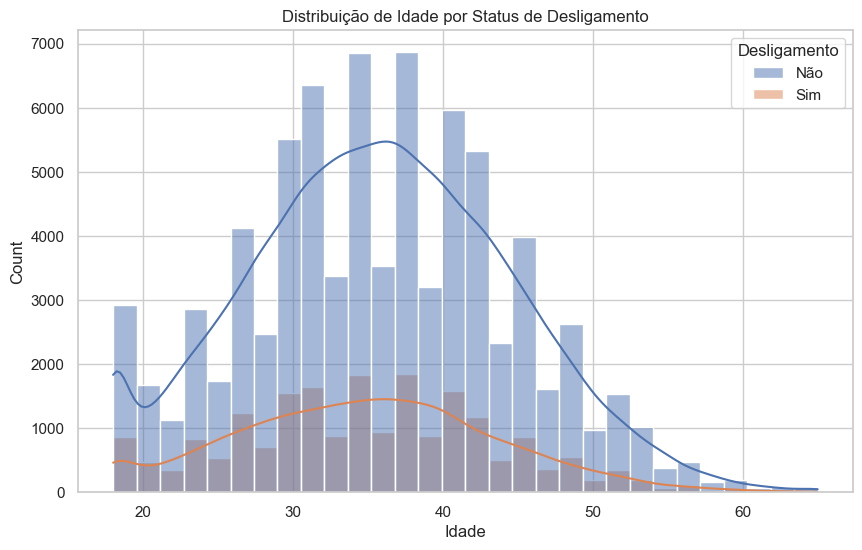

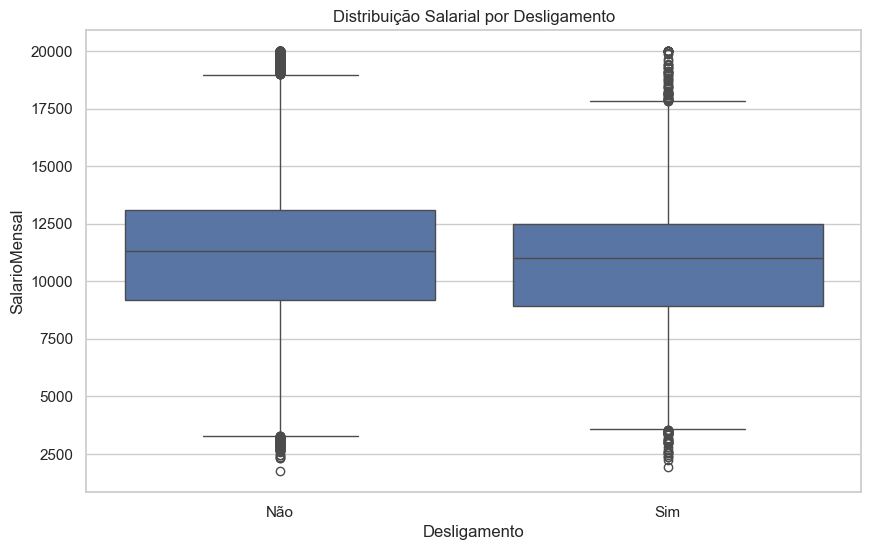

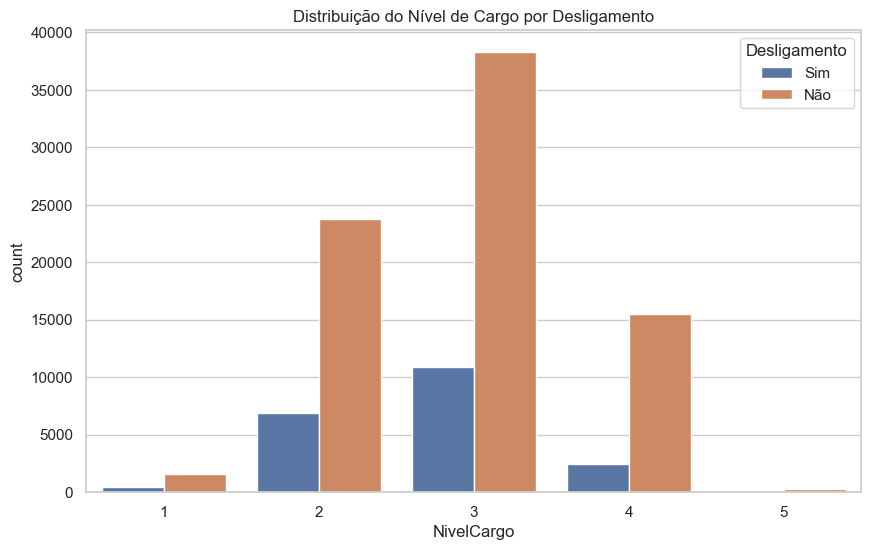

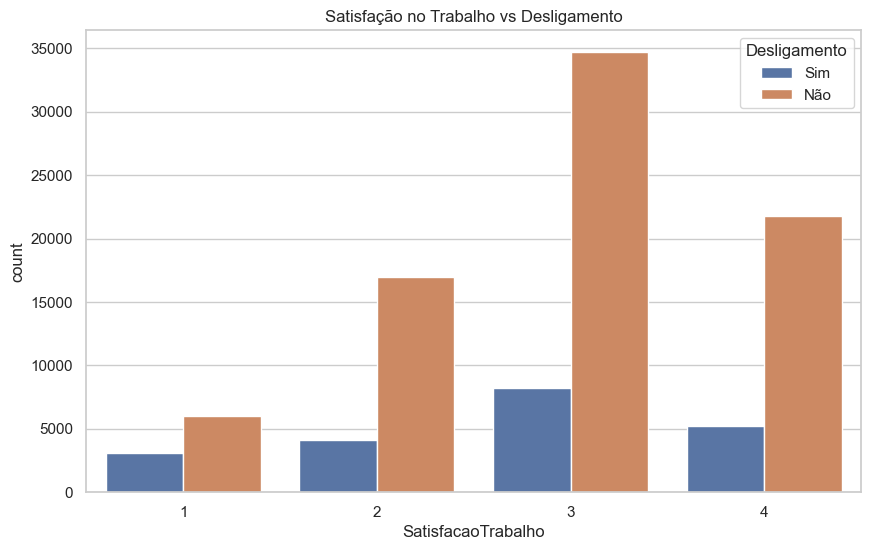

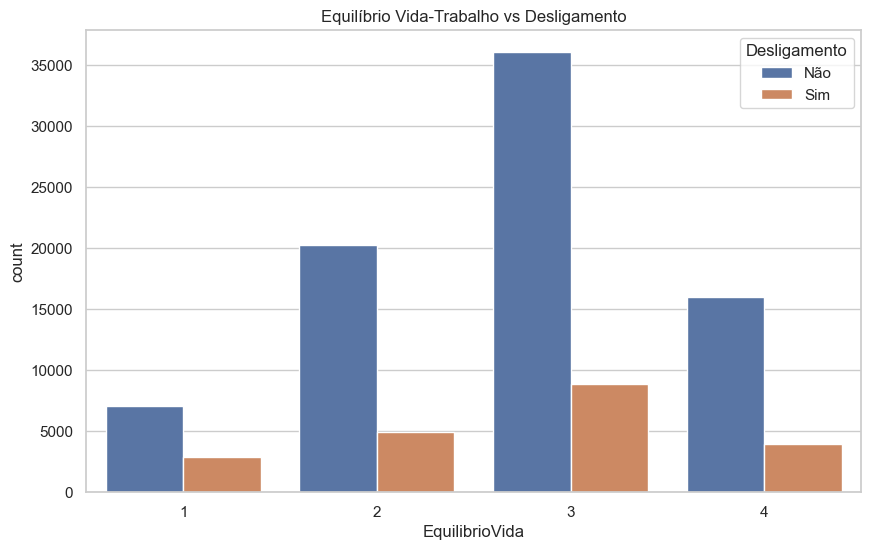

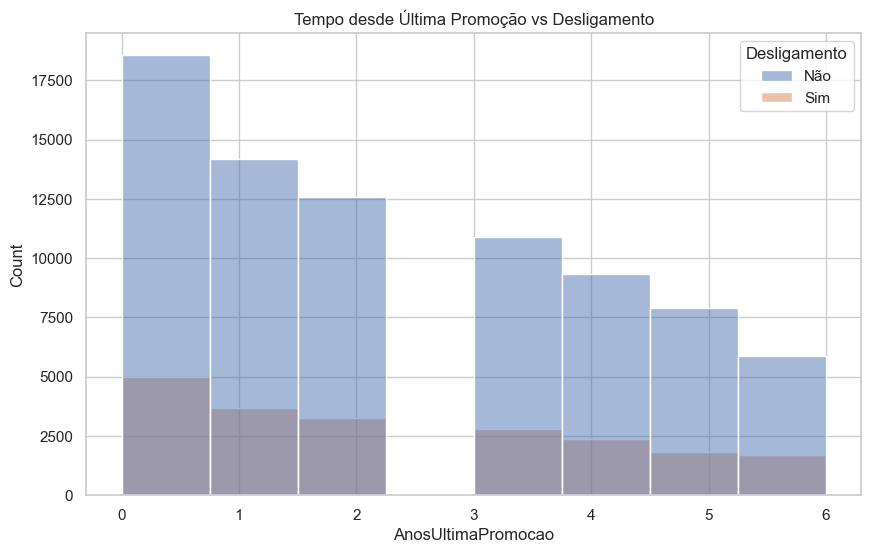

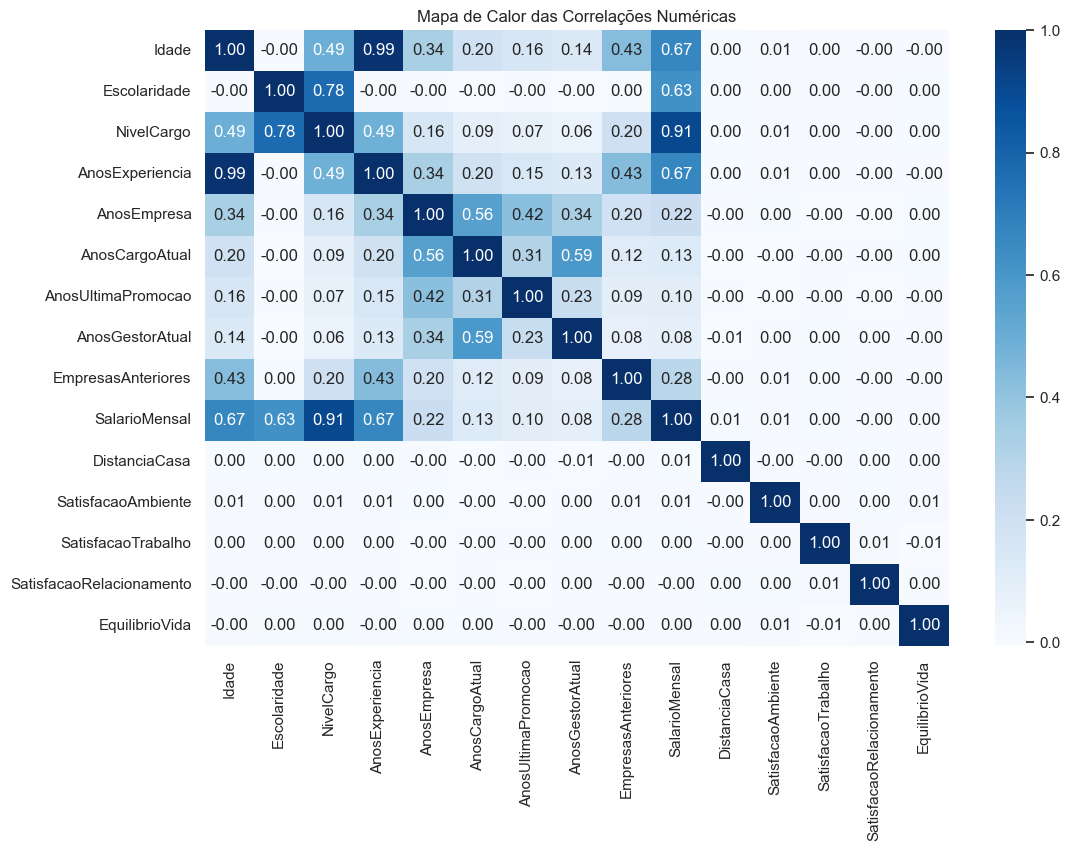

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scripts.func import gerar_base_rh_analitico

# Configurações visuais
sns.set(style="whitegrid")
pd.set_option('display.float_format', '{:.2f}'.format)

# 1. Gerar os dados
df = gerar_base_rh_analitico(qtd_amostras=100_000, semente=42)

# 2. Visão geral
print("🔢 Dimensões do dataset:")
print(df.shape)

print("\n📚 Tipos de dados:")
print(df.dtypes)

print("\n👀 Primeiras 5 linhas:")
print(df.head())

print("\n📈 Estatísticas descritivas numéricas:")
print(df.describe())

# 3. Proporção de desligamentos
print("\n📊 Proporção de desligamento (%):")
print(df['Desligamento'].value_counts(normalize=True) * 100)

# 4. Análise por escolaridade
print("\n🎓 Distribuição por Escolaridade:")
print(df['Escolaridade'].value_counts(normalize=True) * 100)

# 5. Análise de cargos e setores
print("\n💼 Top 5 cargos com mais funcionários:")
print(df['Cargo'].value_counts().head())

print("\n🏢 Distribuição por setor:")
print(df['Setor'].value_counts(normalize=True) * 100)

# 6. Gráficos

# 6.1 Idade x Desligamento
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Idade', hue='Desligamento', kde=True, bins=30)
plt.title("Distribuição de Idade por Status de Desligamento")
plt.show()

# 6.2 Salário mensal x Desligamento
plt.figure(figsize=(10, 6))
sns.boxplot(x='Desligamento', y='SalarioMensal', data=df)
plt.title("Distribuição Salarial por Desligamento")
plt.show()

# 6.3 Nível de Cargo x Desligamento
plt.figure(figsize=(10, 6))
sns.countplot(x='NivelCargo', hue='Desligamento', data=df)
plt.title("Distribuição do Nível de Cargo por Desligamento")
plt.show()

# 6.4 Satisfação no trabalho
plt.figure(figsize=(10, 6))
sns.countplot(x='SatisfacaoTrabalho', hue='Desligamento', data=df)
plt.title("Satisfação no Trabalho vs Desligamento")
plt.show()

# 6.5 Equilíbrio vida-trabalho
plt.figure(figsize=(10, 6))
sns.countplot(x='EquilibrioVida', hue='Desligamento', data=df)
plt.title("Equilíbrio Vida-Trabalho vs Desligamento")
plt.show()

# 6.6 Anos desde última promoção
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AnosUltimaPromocao', hue='Desligamento', bins=8)
plt.title("Tempo desde Última Promoção vs Desligamento")
plt.show()

# 6.7 Correlação numérica
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Mapa de Calor das Correlações Numéricas")
plt.show()
